# Formalia:

Please read the [assignment overview page](https://github.com/SocialComplexityLab/socialgraphs2023/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Tuesday September 26th, 2023 at 23:55. Hand in your IPython notebook file (with extension `.ipynb`) via http://peergrade.io/

The assignment should be handed in as a group. To do this, all group members must register for peergrade individually. See how to hand in as a group here: https://help.peergrade.io/en/articles/69783-how-to-submit-as-a-group .

(If you haven't set up an account on peergrade yet, go to www.peergrade.io/join and type in the class code: ***DPZEV6***.)

# Part 1: Binning degree distributions


* Binning real numbers
  * Let's do a gentle start and use the `random` library generate 5000 data points from a Gaussian distribution with $\mu = 2$ and $\sigma = 0.125$.
  * Now, let's use `numpy.histogram` to bin those number into 10 bins. What does the `numpy.histogram` function return? Do the two arrays have the same length?
  * Then we use `matplotlib.pyplot.plot` to plot the binned data. You will have to deal with the fact that the counts- and bin-arrays have different lengths. Explain how you deal with this problem and why.

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [4]:
# Generate 5000 data points from a Gaussian distribution
mu = 2
sigma = 0.125
points = []
for i in range(5000): 
    temp = random.gauss(mu, sigma) 
    points.append(temp)

In [5]:
# Bin those number into 10 bins
hist_values, bin_edges = np.histogram(points, bins=10)
hist_values, bin_edges

(array([   4,   28,  143,  493, 1153, 1474, 1081,  473,  133,   18]),
 array([1.4794783 , 1.57428279, 1.66908728, 1.76389177, 1.85869625,
        1.95350074, 2.04830523, 2.14310972, 2.23791421, 2.33271869,
        2.42752318]))

In [6]:
len(hist_values) == len(bin_edges)

False

The numpy function returns 2 elements: array with values of the histogram and array with bin edges.

They don't have the same length - there is always N + 1 number od edges, where N is number of bins.

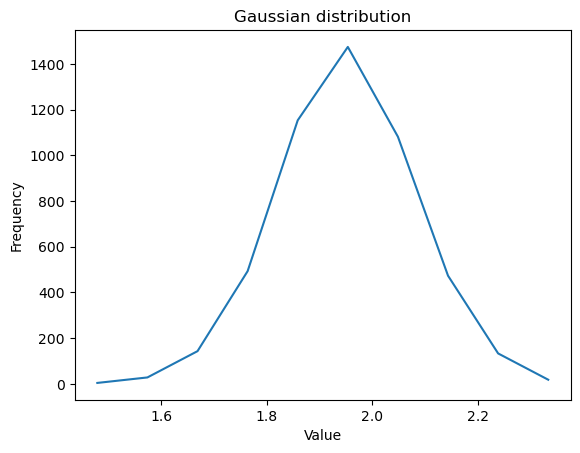

In [7]:
# Use matplotlib.pyplot.plot to plot the binned data
plt.plot(bin_edges[:-1], hist_values)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Gaussian distribution')
plt.show()

* Binning integers
  * But binning real numbers into a fixed number of bins is easy when `numpy.histogram` does all the work and finds the right bin boundaries for you. 
Now we'll generate a bunch of integers and set the bin boundaries manually. This time, let's grab data from a Poisson distribution. As it turns out `numpy` also has some convenient random number generators. Use `numpy.random.poisson` to generate 5000 numbers drawn from a Poisson distribution characterized by $\lambda = 10$. Find the maximum and minimum value of your 5000 random numbers. 
  * Instead of simplify specifying the number of bins for `numpy.histogram`, let's specify the bins we want using a vector. Create a vector $v$ that results in a binning that puts each integer value in its own bin and where the first bin contains the minimum number you found above, and the last bin contains the maximum number (you may want to think about how `numpy.histogram` deals with the smallest an largest value in particular; is it correct to set the first entry of $v$ to be equal to the smallest value you observe and the last entry of $v$ to be the highest value observed?). Use the vector by setting `numpy.histogram`'s `bin` parameter as `bin = ` $v$. What is the sum over bin counts? Explain how the binning-vectors first and last element relates to the min and max from the Poisson distribution.
  * Now, use a bar chart (`matplotlib.pyplot.bar`) to plot the distribution 

In [8]:
# Use numpy.random.poisson and find the maximum and minimum value of your 5000 random numbers.
poisson_points = np.random.poisson(10, 5000)
minimum = min(poisson_points)
maximum = max(poisson_points)
print(f'Maximum is {maximum} and minimum is {minimum}.')

Maximum is 26 and minimum is 1.


In [9]:
# Create v vector
v = np.arange(minimum, maximum + 1)

In [11]:
# What is the sum over bin counts?
hist_values, bin_edges = np.histogram(poisson_points, bins=v)
bin_sum = np.sum(hist_values)
print(f"Sum over bin counts is {bin_sum}.")

Sum over bin counts is 5000.


- Explain how the binning-vectors first and last element relates to the min and max from the Poisson distribution.

They are meant to match min and max values of Poisson distribution so entire range of values is included on the histogram.

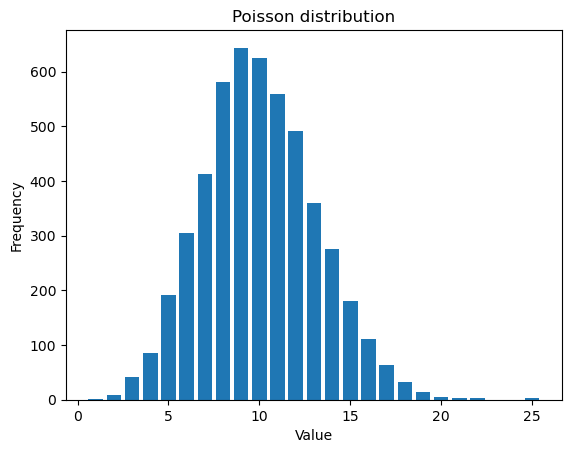

In [12]:
# Now, use a bar chart (`matplotlib.pyplot.bar`) to plot the distribution 
plt.bar(v[:-1], hist_values)

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Poisson distribution')
plt.show()

* Binning and plotting degree distributions. 
  * Let's generate the Erdös-Renyi (ER) network which has a degree distribution that matches the Poisson distribution above. 
First we have to figure out which values the ER parameters (_N_ and _p_) should assume. It's easy to see that $N = 5000$, but how do you find $p$? 
**Hint**: The parameter $\lambda$ in the Poisson distribution corresponds to the average degree, so you have to find a $p$ that results in an average degree, $k = 10$. And you know that $\langle k \rangle = p (N-1)$, which will give you $p$.
  * Now, use `networkx` to create the graph and extract the degree distribution.
  * Finally, create a nice bar plot of the degree distribution, including axes labels and a plot title. Make sure that it looks like the Poisson distribution you plotted above.

Given the following, we can easily calculate $p$ to match Poisson distribution with $\lambda$ = 10

$\langle k \rangle = p (N-1)$

10 = $p (4999)$

p = $10/4999 = 0,002$

In [15]:
# Generate ER network
ER = nx.erdos_renyi_graph(5000, 0.002)
degree_sequence = sorted((d for n, d in ER.degree()), reverse=True)
er_hist, edges = np.histogram(degree_sequence, bins=range(min(degree_sequence), max(degree_sequence) + 1))

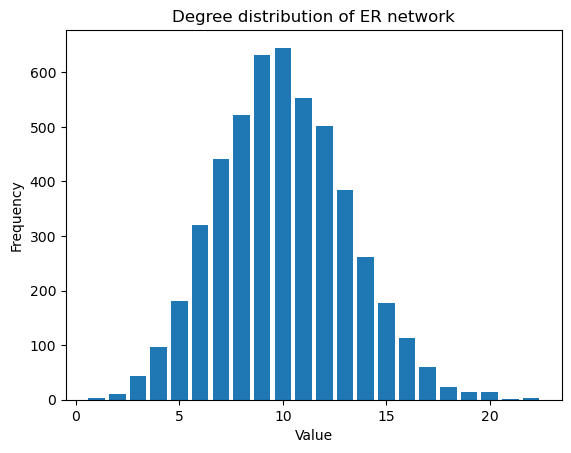

In [16]:
# Create a nice bar plot
plt.bar(edges[:-1], er_hist)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Degree distribution of ER network')
plt.show()

# Part 2: Random networks and plotting in `networkx`
 
* In your notebook, work through NS exercise 3.1 ('Erdős-Rényi Networks'). The exercise can be found in Section 3.11: Homework.
* Paths. Plot a random network with 200 nodes and an average degree of 1.5\. (I suggest using `networkx.draw` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully to get an overview of all the options and what they look like. For example, you may want to shrink the node size).
  * Extract the Giant Connected Component, GCC. (Hint. You can use `networkx.connected_component_subgraphs`)
  * Choose a node at random from the GCC. (Hint: You may want to try `random.choice`.)
  * Find all nodes that are precisely 2 steps away from that node. (Hint. I suggest `networkx.single_source_shortest_path_length`)
  * Plot the GCC with the following choice of colors. Starting node _black_ (`"#000000"`). The nodes 2 steps away _red_ (`"#ff0000"`). All other nodes _blue_ (`"#A0CBE2"`). Again, I suggest using `networkx.draw()` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully find out how to color individual nodes.

By the way, the default plot coming out of `networkx` doesn't look like the one below. But by tweaking parameters, you should be able to create something that looks like it.

![Sune's Network](https://raw.githubusercontent.com/suneman/socialgraphs2019/master/files/edge_colormap.png)

# Part 3: Watts-Strogatz Networks

* Use `nx.watts_strogatz_graph` to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p = 0, 0.1, \textrm{and} 1$. Calculate the average shortest path length $\langle d \rangle$ for each one. Describe what happens to the network when $p = 1$.
* Let's understand the behavior of the WS model as we increase _p_ in more detail.. Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot. My version of the plot is below (since a picture's worth 1000 words).


![Sune's version](https://raw.githubusercontent.com/suneman/socialgraphs2017/master/files/ws.png)

# Part 4. The Barabasi-Albert Model

We're going to create our own Barabasi-Albert model (a special case) in right in a `notebook`. Follow the recipe below for success

* Create a 100 node BA network using a BA model that you've coded on your own (so don't use the built-in NetworkX function, but the one you created during week 3). And plot it using NetworkX.

![Sune's version](https://raw.githubusercontent.com/suneman/socialgraphs2017/master/files/ba.png)

In [19]:
# Own BA model
def calculate_probabilities(unique_list, number_of_nodes):
    probabilities_dict = {}
    for element in unique_list:
        probabilities_dict[element] = G.degree(element) / (2 * len(G.edges()))
    return probabilities_dict

def add_edge(G, unique_list, probabilities_dict, new_edge):
    probabilities = [probabilities_dict[node] for node in unique_list]
    sum_of_probs = sum(probabilities)
    p = [prob / sum_of_probs for prob in probabilities]
    chosen_node = np.random.choice(unique_list, p=p)
    G.add_edge(chosen_node, new_edge)
    
G = nx.Graph()
G.add_edge(1, 2)

all_nodes = np.arange(3, 101)

for node in all_nodes:
    unique_list = list(G.nodes())
    prob_dict = calculate_probabilities(unique_list, node)
    add_edge(G, unique_list, prob_dict, node)

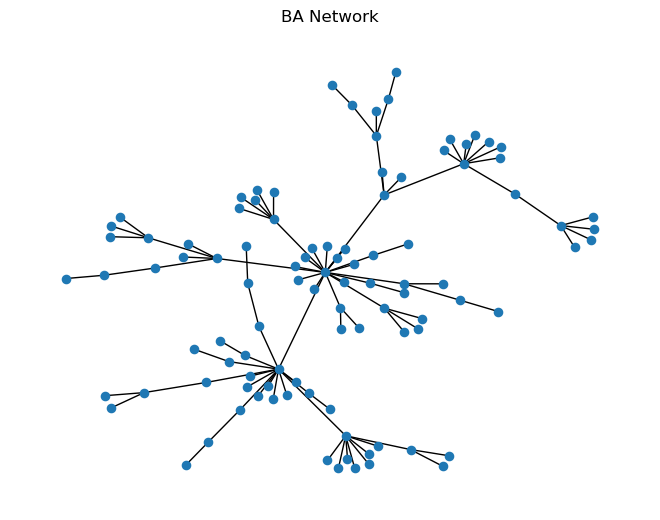

In [21]:
# Plot it using NetworkX
nx.draw(G, pos=nx.spring_layout(G), with_labels=False, node_size=35)
plt.title("BA Network")
plt.show()

* Now create a 5000 node network.
  * What's the maximum and minimum degree?
  * Now, bin the degree distribution, for example using `numpy.histogram`.
  * Plot the distribution. Plot it with both linear and log-log axes.

In [ ]:
# 5000 node network

N = 5000
G = nx.Graph()
G.add_edge(1, 2)

for node in range(3, N + 1):
    unique_list = list(G.nodes())
    prob_dict = calculate_probabilities(unique_list, node)
    add_edge(G, unique_list, prob_dict, node)

degree_sequence = sorted((d for n, d in G.degree()), reverse=True)

In [22]:
# What's the maximum and minimum degree?
max_degree = max(degree_sequence)
min_degree = min(degree_sequence)
print(f"Maximum degree is {min_degree} and maximum degree is {max_degree}.")

Maximum degree is 1 and maximum degree is 23.


In [ ]:
# Now, bin the degree distribution, for example using numpy.histogram
ba_hist, ba_edges = np.histogram(degree_sequence, bins=range(min_degree, max_degree + 2))


# Plot the distribution. Plot it with both linear and log-log axes.
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.bar(ba_edges[:-1], ba_hist)
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution of BA network')

plt.subplot(122)
plt.loglog(bins[:-1], hist, 'o-', color='b')
plt.xlabel('Degree in log scale')
plt.ylabel('Frequency in log scale')
plt.title('Degree Distribution of BA network')

plt.tight_layout()
plt.show()

# Part 5 Power-laws and the friendship paradox

Next step is to explore the [Friendship paradox](https://en.wikipedia.org/wiki/Friendship_paradox). This paradox states that _almost everyone_ have fewer friends than their friends have, on average. This sounds crazy, but is actually an almost trivial consequence of living in a social network with a power-law degree distribution. The explanation is that almost everyone is friends with a hub, that drives up the average degree of the friends. Let's explore that in the 5000 node BA network we've just generated. Do the following:

* Pick a node _i_ at random (e.g. use `random.choice`). [Find its degree](http://networkx.lanl.gov/reference/generated/networkx.Graph.degree.html).
* Find _i_'s [neighbors](http://networkx.lanl.gov/reference/generated/networkx.Graph.neighbors.html). And calculate their average degree.
* Compare the two numbers to check if it's true that _i_'s friends (on average) have more friends than _i_.
* Do this 1000 times. How many out of those 1000 times is the friendship paradox true?

Finally, we'll build a network of same size and degree, using the growth mechanism without the preferential attachment. 

* Compare to the ER network of same size and same $p$. What are the differences? Explain in your own words. *Hint*: To get started, take a look at the degree distribution, and study the number of connected components.

# Part 6 Configuration-model networks

Next, we will create configuration-model networks with degree distributions of our own choice. Follow the recipe below for success

* Extract the degree sequence for the 100-node Barabasi-Albert network you created in Part 4 above. Create the configuration-model network with an algorithm you have coded on your own and include this algorithm as part of your answer to this exercise (so don't use the built-in NetworkX function, but the one you created during week 3). 
* Plot the network using NetworkX. When you compare this network to your Barabasi-Albert network visually, what differences do you notice?
* Create a 5000-node configuration-model network, where half of the nodes have degree 3 and the other half have degree 5. Again, create the network using the function you coded in Week 3, and not using the NetworkX function.
* What should the sum of node degrees be if all nodes had degrees as described in the exercise?
* Calculate and print the sum of node degrees and plot the binned degree distribution nicely. If the node degrees are not exactly as described in the exercise (half having degree 3, the other half degree 5), explain what might have caused this difference in node degrees.